In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf

In [9]:
df1=pd.read_csv('dataexport_20200613T163949.csv')
df1.head(15)

,location,Wrocław,Wrocław.1,Wrocław.2,Wrocław.3
0,lat,51.09574,51.09574,51.09574,51.09574
1,lon,17.01806,17.01806,17.01806,17.01806
2,asl,116.635,116.635,116.635,116.635
3,variable,Temperature,Precipitation Total,Wind Speed,Wind Direction
4,unit,°C,mm,km/h,°
5,level,2 m elevation corrected,sfc,10 m,10 m
6,resolution,hourly,hourly,hourly,hourly
7,aggregation,NaN,NaN,NaN,NaN
8,timestamp,Wrocław Temperature [2 m elevation corrected],Wrocław Precipitation Total,Wrocław Wind Speed [10 m],Wrocław Wind Direction [10 m]
9,20200601T0000,13.44463,0.0,11.038736,8.325638


In [6]:
wro_temp = pd.read_csv('dataexport_20200613T163949.csv',skiprows=9,index_col=0,parse_dates=True)
wro_temp.head()

,Wrocław Temperature [2 m elevation corrected],Wrocław Precipitation Total,Wrocław Wind Speed [10 m],Wrocław Wind Direction [10 m]
timestamp,,,,
2020-06-01 00:00:00,13.444630,0.0,11.038736,8.325638
2020-06-01 01:00:00,12.224629,0.0,10.738927,7.125000
2020-06-01 02:00:00,11.424629,0.0,10.922400,12.680374
2020-06-01 03:00:00,10.614630,0.0,10.084568,12.200455
2020-06-01 04:00:00,9.784630,0.0,9.155017,8.365875


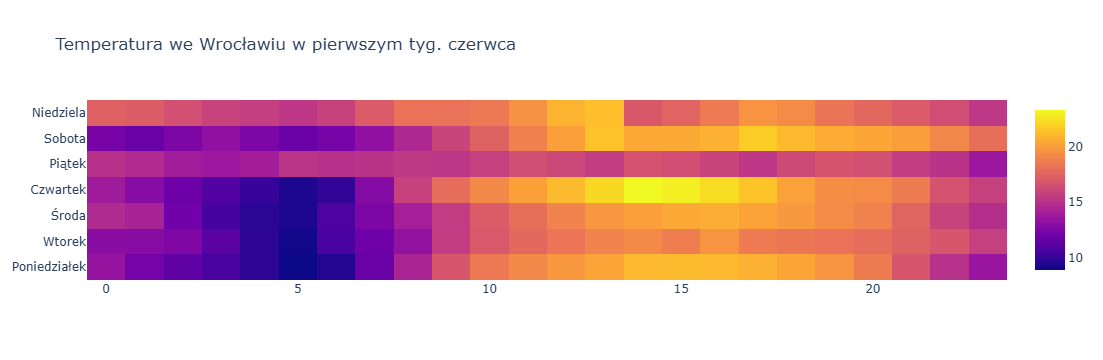

In [11]:
fig = go.Figure()

fig.add_trace(go.Heatmap(x=wro_temp.index.hour,
                         y=wro_temp.index.weekday.map({0:'Poniedziałek',1:'Wtorek',2:'Środa',
                                                       3:'Czwartek',4:'Piątek',5:'Sobota',6:'Niedziela'}),
                         z=wro_temp['Wrocław Temperature [2 m elevation corrected]'].tolist()))
fig.update_layout(title='Temperatura we Wrocławiu w pierwszym tyg. czerwca')
fig.show()

In [14]:
from plotly.subplots import make_subplots

In [16]:
fig = make_subplots(rows=1,cols=2,subplot_titles=['Temperatura','Opady'],shared_yaxes=True)

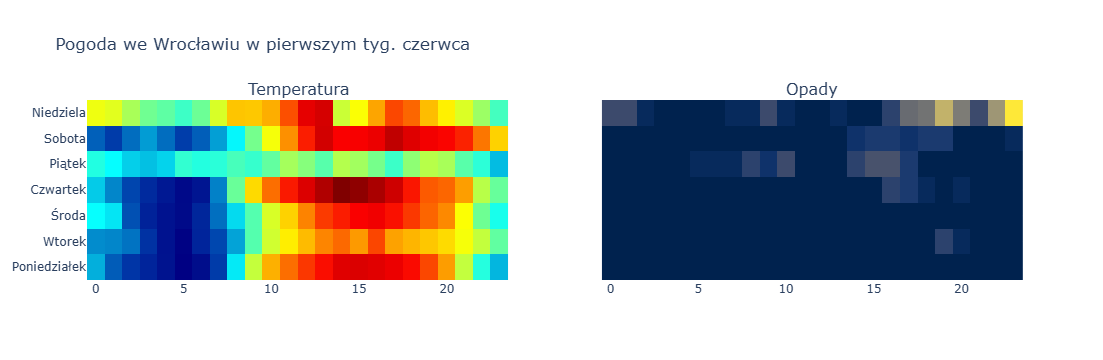

In [17]:
fig.add_trace(go.Heatmap(x=wro_temp.index.hour,
                         y=wro_temp.index.weekday.map({0:'Poniedziałek',1:'Wtorek',2:'Środa',3:'Czwartek',4:'Piątek',5:'Sobota',6:'Niedziela'}),
                         z=wro_temp['Wrocław Temperature [2 m elevation corrected]'].tolist(),
                        colorscale='Jet',
                        showscale=False),1,1)

fig.add_trace(go.Heatmap(x=wro_temp.index.hour,
                         y=wro_temp.index.weekday.map({0:'Poniedziałek',1:'Wtorek',2:'Środa',3:'Czwartek',4:'Piątek',5:'Sobota',6:'Niedziela'}),
                         z=wro_temp['Wrocław Precipitation Total'].tolist(),
                        colorscale='Cividis',
                        showscale=False),1,2)

fig.update_layout(title='Pogoda we Wrocławiu w pierwszym tyg. czerwca')
fig.show()